In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

In [4]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv('Gold_data.csv',index_col='date',parse_dates=True) # date column as index making
df.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [7]:
df.dropna()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [8]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


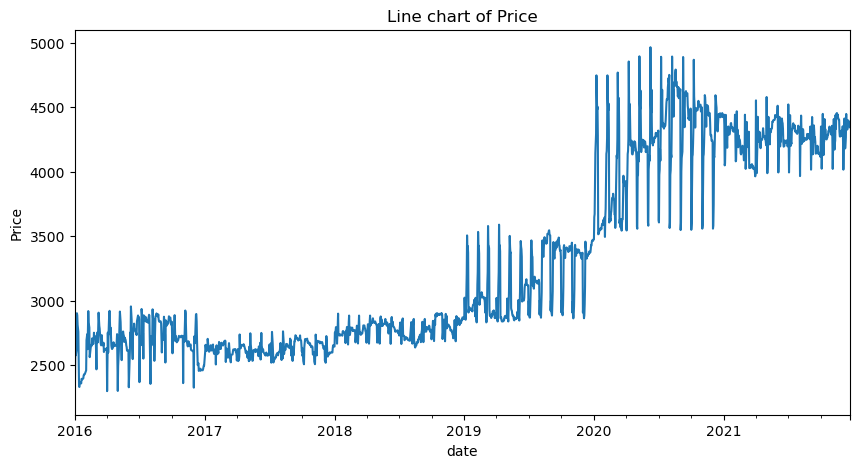

In [9]:
# prompt: plot line chart for price

import matplotlib.pyplot as plt
df['price'].plot(figsize=(10,5))
plt.title('Line chart of Price')
plt.ylabel('Price')
plt.show()


In [10]:
# prompt: convert df into monthwise

df_month = df.resample('M').mean()
df_month


,price
date,
2016-01-31,2495.832258
2016-02-29,2688.703448
2016-03-31,2682.854839
2016-04-30,2677.790000
2016-05-31,2677.650000
...,...
2021-08-31,4264.919355
2021-09-30,4207.506667
2021-10-31,4289.148387


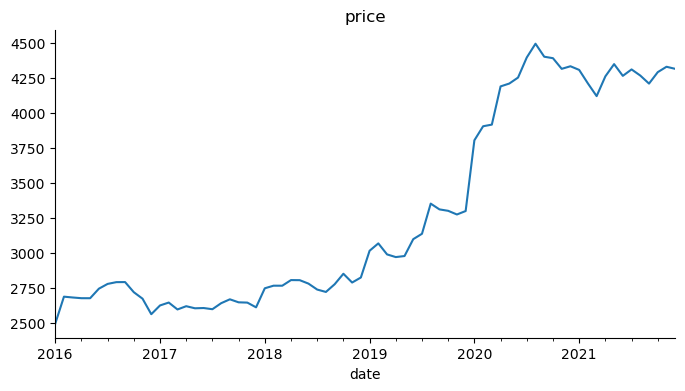

In [11]:
# @title price by month

from matplotlib import pyplot as plt
df_month['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: title={'center': 'price'}, xlabel='date'>

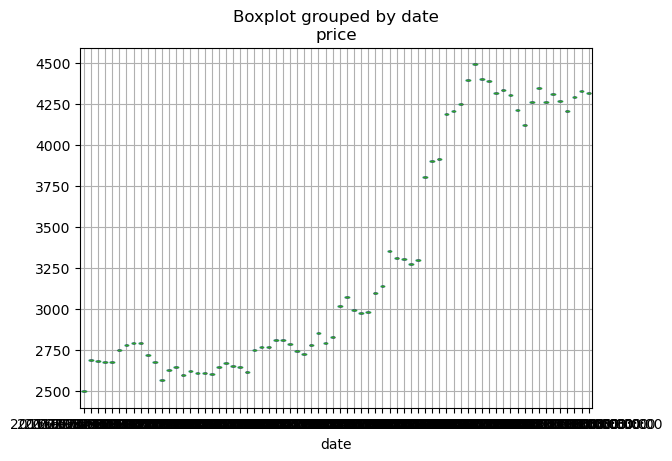

In [12]:
# @title Price distribution by month

df_month.boxplot(column='price', by='date')

In [13]:
# prompt: resample into weeklywise

df_week = df.resample('W').mean()
df_week


,price
date,
2016-01-03,2471.733333
2016-01-10,2740.778571
2016-01-17,2439.657143
2016-01-24,2385.528571
2016-01-31,2427.692857
...,...
2021-11-28,4298.785714
2021-12-05,4237.885714
2021-12-12,4311.571429


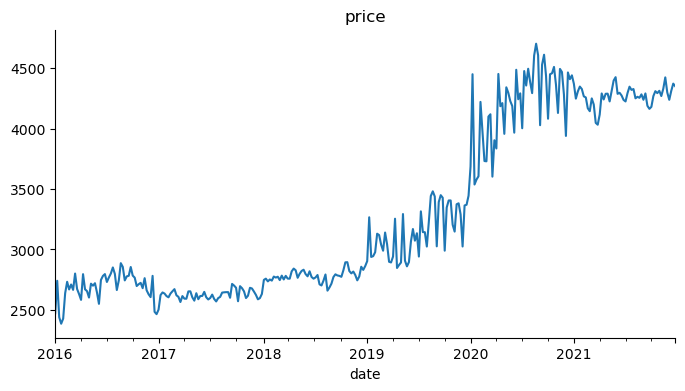

In [14]:
# @title price weekwise

from matplotlib import pyplot as plt
df_week['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
# prompt: resample yearwise

df_year = df.resample('Y').mean()
df_year


,price
date,
2016-12-31,2690.614162
2017-12-31,2626.676484
2018-12-31,2781.938082
2019-12-31,3150.210685
2020-12-31,4216.378689
2021-12-31,4266.871549


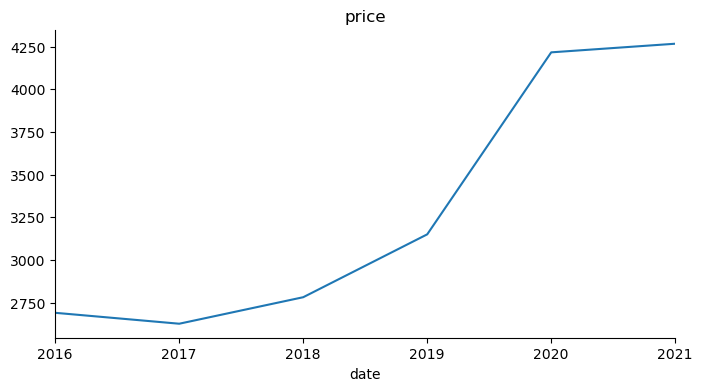

In [16]:
# @title price by year

from matplotlib import pyplot as plt
df_year['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

ADF Statistic: -0.1818324563555466
p-value: 0.9406527773029353


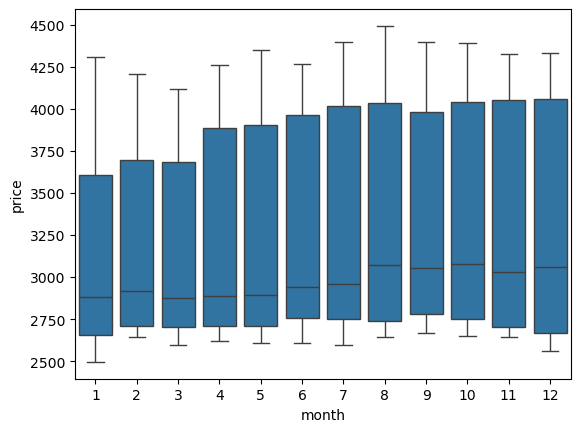

In [17]:
# prompt: check trend and seasonality on price distribution by month

import matplotlib.pyplot as plt
# Check for trend
adf_result = adfuller(df_month['price'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# Check for seasonality
df_month['month'] = df_month.index.month
sns.boxplot(x='month', y='price', data=df_month)
plt.show()


In [18]:
# prompt: check trend and seasonality on price distribution by week

import matplotlib.pyplot as plt
# Check for trend
#adf_result = adfuller(df_week['price'])
#print('ADF Statistic:', adf_result[0])
#print('p-value:', adf_result[1])

# Check for seasonality
#df_week['week'] = df_week.index.week
#sns.boxplot(x='week', y='price', data=df_week)
#plt.show()


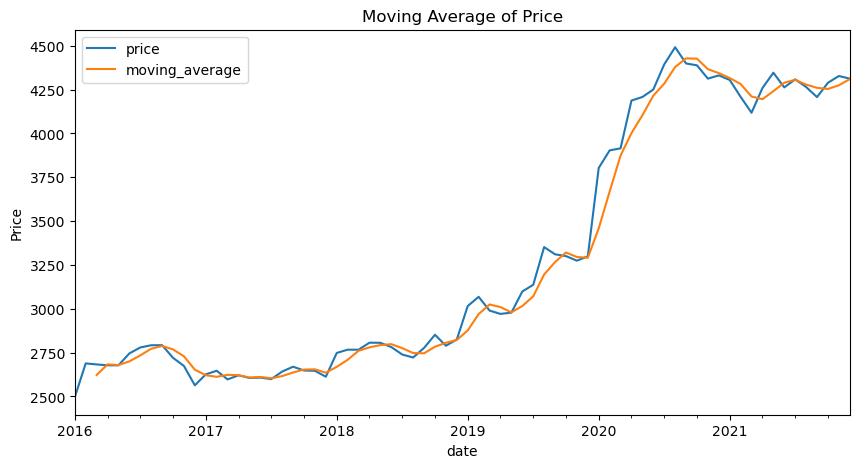

In [19]:
# prompt: apply transformation moving average

import matplotlib.pyplot as plt
df_month['moving_average'] = df_month['price'].rolling(window=3).mean()
df_month[['price', 'moving_average']].plot(figsize=(10, 5))
plt.title('Moving Average of Price')
plt.ylabel('Price')
plt.show()


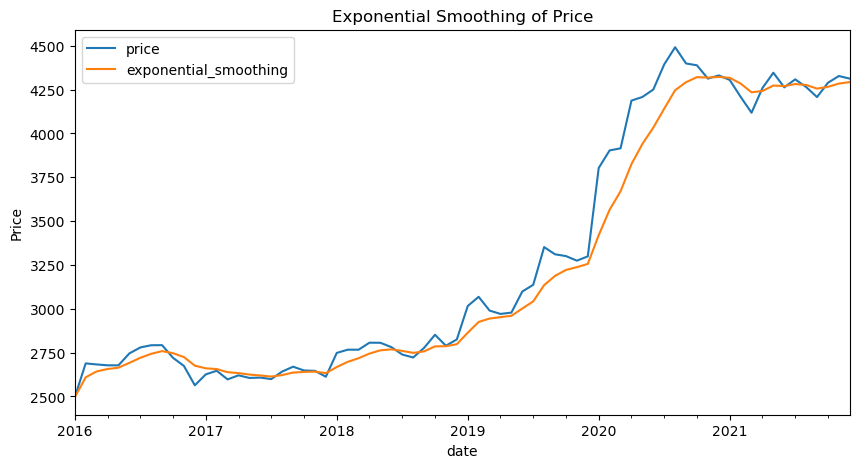

In [20]:
# prompt: exponential

import matplotlib.pyplot as plt
df_month['exponential_smoothing'] = df_month['price'].ewm(alpha=0.3).mean()
df_month[['price', 'exponential_smoothing']].plot(figsize=(10, 5))
plt.title('Exponential Smoothing of Price')
plt.ylabel('Price')
plt.show()


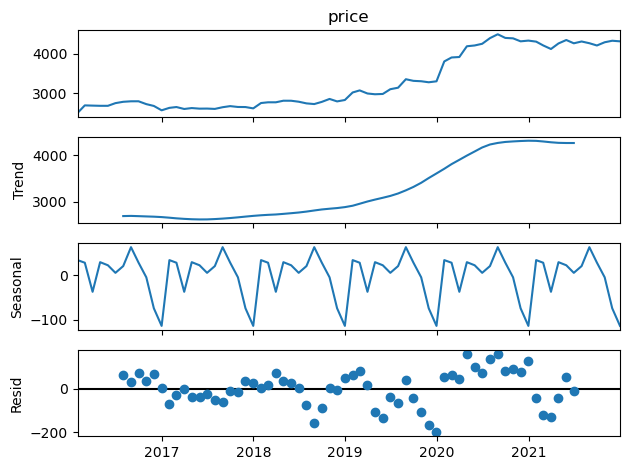

In [21]:
# prompt: seasonality decomposition

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_month['price'], period=12, model='additive')

# Plot the decomposed components
decomposition.plot()
plt.show()


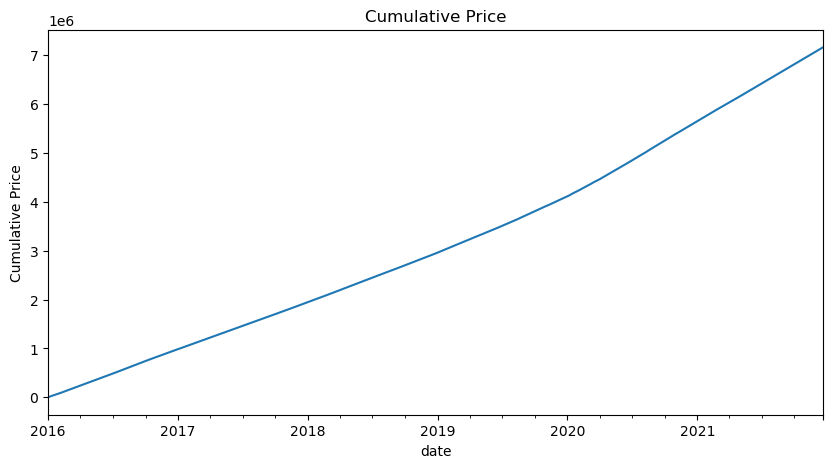

In [22]:
# prompt: cumulative

import matplotlib.pyplot as plt
df['cumulative_price'] = df['price'].cumsum()
df['cumulative_price'].plot(figsize=(10, 5))
plt.title('Cumulative Price')
plt.ylabel('Cumulative Price')
plt.show()


In [23]:
# prompt: check for stationary

from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print('Series is stationary.')
    else:
        print('Series is not stationary.')

check_stationarity(df_month['price'])


ADF Statistic: -0.1818324563555466
p-value: 0.9406527773029353
Series is not stationary.


In [24]:
# prompt: convert series into stationary

import numpy as np
# Differencing
df_month['price_diff'] = df_month['price'] - df_month['price'].shift(1)
check_stationarity(df_month['price_diff'].dropna())

# Log Transformation
df_month['log_price'] = np.log(df_month['price'])
check_stationarity(df_month['log_price'].dropna())

# Square Root Transformation
df_month['sqrt_price'] = np.sqrt(df_month['price'])
check_stationarity(df_month['sqrt_price'].dropna())



ADF Statistic: -7.6913463864257245
p-value: 1.4165341719080967e-11
Series is stationary.
ADF Statistic: -0.34636414486047773
p-value: 0.9186762590319575
Series is not stationary.
ADF Statistic: -0.2567996742760512
p-value: 0.9314038505610593
Series is not stationary.


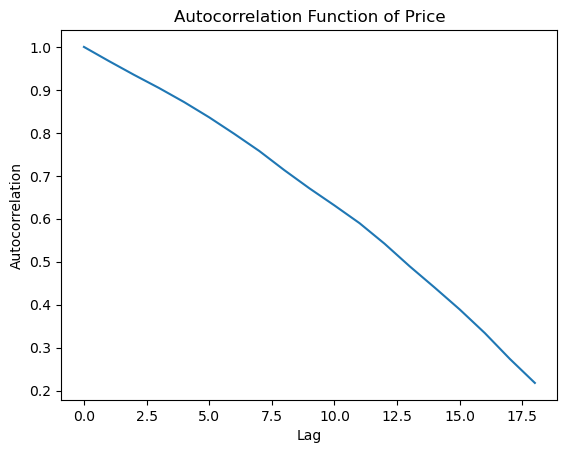

Number of significant changes: 17


In [25]:
# prompt: check amount of changes by auto correlation method

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf

# Calculate the autocorrelation function of the price series
acf_values = acf(df_month['price'])

# Plot the autocorrelation function
plt.plot(acf_values)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function of Price')
plt.show()

# Count the number of significant changes in the autocorrelation function
num_changes = 0
for i in range(1, len(acf_values)):
    if abs(acf_values[i]) > 2 / np.sqrt(len(df_month['price'])):
        num_changes += 1

print('Number of significant changes:', num_changes)


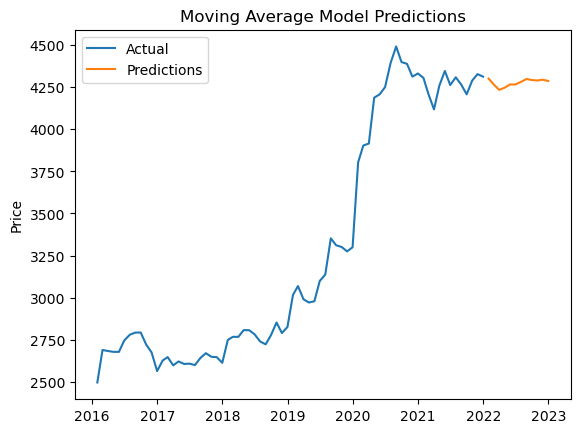

In [26]:
# prompt: create moving average model

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Create the model
model = ARIMA(df_month['price'], order=(5, 1, 5))

# Fit the model
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=12)

# Plot the predictions
plt.plot(df_month['price'], label='Actual')
plt.plot(predictions, label='Predictions')
plt.title('Moving Average Model Predictions')
plt.ylabel('Price')
plt.legend()
plt.show()


In [27]:
# prompt: accuracy for moving average model

from sklearn.metrics import mean_squared_error
from math import sqrt

actual_values = df_month['price'][-12:]
predicted_values = predictions

mse = mean_squared_error(actual_values, predicted_values)
rmse = sqrt(mse)

print('Mean squared error:', mse)
print('Root mean squared error:', rmse)


Mean squared error: 2857.428883060405
Root mean squared error: 53.45492384299509


In [28]:
! pip install pmdarima
! pip install --upgrade pmdarima
! pip cache purge

Files removed: 2


In [29]:
# AIRMA model building
import pmdarima as pm

stepwise_fit = pm.auto_arima(df['price'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26623.835, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26849.714, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26851.587, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26851.536, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26847.869, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26631.605, Time=1.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26635.529, Time=1.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26625.835, Time=3.74 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26625.835, Time=4.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26662.140, Time=0.94 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26629.134, Time=2.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26633.886, Time=1.84 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26613.890, Time=3.03 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=26592.637, Time=4.92 sec
 ARIMA(4,1,2)(0,0,0

In [30]:
# create Arima Model
# split the data
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(2152, 2) (30, 2)


In [31]:
model= ARIMA(train['price'],order=(5,1,5))
model = model.fit()

In [32]:
# Evaluting the model
pred = model.predict(start = 2152, end = 2181)

In [33]:
print(pred.shape)
print(test['price'].shape)

(30,)
(30,)


In [34]:
if pred.shape[0] != test['price'].shape[0]:
    raise ValueError("pred and test['price'] must have the same number of elements")

In [35]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(pred,test['price']))
print(rmse)

94.0061904223725


In [36]:
pred

2021-11-22    4422.668363
2021-11-23    4395.905530
2021-11-24    4385.289359
2021-11-25    4358.840965
2021-11-26    4336.024394
2021-11-27    4372.867095
2021-11-28    4344.609099
2021-11-29    4330.709652
2021-11-30    4329.794130
2021-12-01    4321.599580
2021-12-02    4352.764493
2021-12-03    4318.845629
2021-12-04    4309.520878
2021-12-05    4329.626067
2021-12-06    4319.735269
2021-12-07    4336.737259
2021-12-08    4306.586725
2021-12-09    4307.098594
2021-12-10    4336.559365
2021-12-11    4315.104168
2021-12-12    4322.560013
2021-12-13    4306.282897
2021-12-14    4312.731705
2021-12-15    4338.967545
2021-12-16    4306.757893
2021-12-17    4314.574808
2021-12-18    4314.413542
2021-12-19    4317.098217
2021-12-20    4334.176353
2021-12-21    4300.102822
Freq: D, Name: predicted_mean, dtype: float64

In [37]:
# prompt: acuuracy rate of arima model

# Calculate the accuracy rate of the ARIMA model

accuracy = 100 - (rmse / test['price'].mean()) * 100
print('Accuracy rate of the ARIMA model:', accuracy, '%')


Accuracy rate of the ARIMA model: 97.8178659262308 %


In [38]:
# prompt: accuracy of model with r2 score

from sklearn.metrics import r2_score
print('R2 Score:',r2_score(test['price'],pred))


R2 Score: -0.2673893717461844


In [39]:
# prompt: evaluate the model

model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   72
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -417.197
Date:                Sun, 31 Mar 2024   AIC                            856.394
Time:                        16:00:51   BIC                            881.284
Sample:                    01-31-2016   HQIC                           866.292
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3864      0.794      0.487      0.627      -1.170       1.943
ar.L2         -0.2944      0.601     -0.490      0.624      -1.472       0.883
ar.L3          0.4949      0.355      1.393      0.164      -0.202       1.191
ar.L4         -0.3003      0.736     -0.408      0.683      -1.743       1.143
ar.L5         -0.1552      0.681     -0.228      0.820      -1.490       1.180
ma.L1         -0.2174      0.678     -0.321      0.748      -1.546       1.111
ma.L2          0.1501      0.431      0.348      0.727      -0.694       0.994
ma.L3         -0.2409      0.342     -0.705      0.481      -0.911       0.429
ma.L4          0.1710      0.640      0.267      0.789      -1.083       1.425
ma.L5          0.7083      0.676      1.048      0.295      -0.617       2.033
sigma2      9032.3206   2615.106      3.454      0.001    3906.807    1.42e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                85.82
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               3.19   Skew:                             1.58
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
# prompt: day wise model prediction

# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load the dataset
df = pd.read_csv('Gold_data.csv', index_col='date', parse_dates=True)

# Preprocess the data
data = df.filter(['price'])
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_data, train_data, epochs=10, batch_size=32)

# Make predictions on the test data
predictions = model.predict(test_data)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Calculate the accuracy of the model
accuracy = r2_score(test_data, predictions)
print('Accuracy:', accuracy)

# Make predictions for the next day
next_day_prediction = model.predict(np.array(test_data[-1:]))
next_day_prediction = scaler.inverse_transform(next_day_prediction)
print('Prediction for the next day:', next_day_prediction)


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0999
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0306
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016  
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
Accuracy: -6092747786.68713
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction for the next day: [[4309.789]]


In [41]:
# prompt: next month prediction with month input

import datetime

# Get the current month
current_month = datetime.datetime.now().month

# Get the next month
next_month = current_month + 1

# Make a prediction for the next month
next_month_prediction = model_fit.forecast(steps=1)[0]

# Print the prediction
print(f'Predicted price for next month: {next_month_prediction}')


Predicted price for next month: 4301.123895305829


In [44]:
# saving the model

import pickle

# Save the model to a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model from the pickle file
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)


AttributeError: Can't pickle local object 'Layer._initializer_tracker.<locals>.<lambda>'

In [43]:
with open('gpp.pkl', 'rb') as f:
    model = pickle.load(f)

EOFError: Ran out of input

In [ ]:
print(test.head())
print(test.iloc[0].shape)
test_array = np.array(test.iloc[0])

In [ ]:
test_reshaped = test_array.reshape(1,-1)